# Singapore Weather Prediction

In [57]:
import pandas as pd
import requests

### Data Acquisition

Data source: [data.gov.sg](https://data.gov.sg/) - National Environment Agency

Data format: CKAN APIs 
- access to static tabular data such as time series or listings
- alternative to the data.gov.sg web interface
- provides both RESTful and functional interfaces, all in JSON format, making it suitable for a wide range of clients.

API used: CKAN Datastore Search
- GET URL with endpoint: https://data.gov.sg/api/action/datastore_search

| Name               | Description                                                                                                                                                                                                                                                                                                                                                      |
|:-------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **resource_id \*** | ID or alias of the resource to be searched against                                                                                                                                                                                                                                                                                                               |
| limit              | Maximum number of rows to return (optional, default: 100)<br>_Default value_: 100                                                                                                                                                                                                                                                                                |
| offset             | Offset this number of rows (optional)                                                                                                                                                                                                                                                                                                                            |
| fields             | Fields to return (optional, default: all fields in original order)                                                                                                                                                                                                                                                                                               |
| filters            | Dictionary of matching conditions, e.g., {"key1": "a", "key2": "b"} (optional)                                                                                                                                                                                                                                                                                   |
| q                  | Full text query. If it’s a string, it’ll search on all fields on each row.<br>If it’s a dictionary as {"key1": "a", "key2": "b"}, it’ll search on each specific field (optional)                                                                                                                                                                                 |
| sort               | Comma-separated field names with ordering, e.g.: "fieldname1, fieldname2 desc" (optional)                                                                                                                                                                                                                                                                        |
| records_format     | The format for the records return value:<br>'objects' (default) list of {fieldname1: value1, ...} dicts,<br>'lists' list of [value1, value2, ...] lists,<br>'csv' string containing comma-separated values with no header,<br>'tsv' string containing tab-separated values with no header<br>_Available values_: objects, lists, csv<br>_Default value_: objects |


In [76]:
api_endpoint = "https://data.gov.sg/api/action/datastore_search"
surface_air_temp_monthly_mean_resource_id = "07654ce7-f97f-49c9-81c6-bd41beba4e96"
surface_air_temp_monthly_abs_extreme_max_resource_id = "96e66346-68bb-4ca9-b001-58bbf39e36a7"
surface_air_temp_monthly_abs_extreme_min_resource_id = "0c5b9752-2488-46cc-ae1c-42318d0f8865"
rainfall_monthly_total_resource_id = "778814b8-1b96-404b-9ac9-68d6c00e637b"
rainfall_monthly_max_daily_total_resource_id = "df4d391e-6950-4fc6-80cd-c9b9ef6354fe"
rainfall_monthly_num_rain_days_resource_id = "8b94f596-91fd-4545-bf9e-7a426493b674"
relative_humidity_monthly_mean_resource_id = "4631174f-9858-463d-8a88-f3cb21588c67"
relative_humidity_monthly_abs_extreme_min_resource_id = "585c24a5-76cd-4c48-9341-9223de5adc1d"
sunshine_duration_monthly_mean_daily_resource_id = "0230819f-1c83-4980-b738-56136d6dc300"

resource_ids = [surface_air_temp_monthly_mean_resource_id,
surface_air_temp_monthly_abs_extreme_max_resource_id,
surface_air_temp_monthly_abs_extreme_min_resource_id,
rainfall_monthly_total_resource_id,
rainfall_monthly_max_daily_total_resource_id,
rainfall_monthly_num_rain_days_resource_id,
relative_humidity_monthly_mean_resource_id,
relative_humidity_monthly_abs_extreme_min_resource_id,
sunshine_duration_monthly_mean_daily_resource_id]

merged_df = None
for resource_id in resource_ids:
    url = api_endpoint + "?resource_id=" + resource_id + "&limit=1000"
    response = requests.get(url).json()
    data = response['result']['records']
    df = pd.DataFrame(data).set_index('month').drop('_id', axis=1)
    if merged_df is None:
        merged_df = df
        continue
    merged_df = pd.merge(merged_df, df, on='month')

new_names = {'max_temperature': 'max_temp', 'temp_extremes_min': 'min_temp', 'maximum_rainfall_in_a_day': 'max_rainfall_daily', 'no_of_rainy_days': 'num_rainy_days', 'rh_extremes_minimum': 'min_rh', 'mean_sunshine_hrs': 'mean_sunshine_hrs_daily'}
df = merged_df.rename(columns=new_names)
print(df)


        mean_temp max_temp min_temp total_rainfall max_rainfall_daily   
month                                                                   
1982-01      25.9     31.9     21.9          107.1               36.5  \
1982-02      27.1     34.3     22.6           27.8                9.4   
1982-03      27.2     34.3     22.3          160.8               61.7   
1982-04        27     33.2     22.2            157               45.1   
1982-05        28     32.9     23.7          102.2                 33   
...           ...      ...      ...            ...                ...   
2022-12      26.8     32.7     23.1          215.4                 37   
2023-01      26.5     34.2     22.4          302.6                 72   
2023-02      26.9       32     21.7          324.4              154.8   
2023-03      27.1     33.6     21.8          243.4               90.2   
2023-04      28.5     34.3       23          222.8               85.8   

        num_rainy_days mean_rh min_rh mean_sunshin

In [82]:
df.index = pd.to_datetime(df.index)
df['year'] = df.index.year
df['month'] = df.index.month
print(df)

           mean_temp max_temp min_temp total_rainfall max_rainfall_daily   
month                                                                      
1982-01-01      25.9     31.9     21.9          107.1               36.5  \
1982-02-01      27.1     34.3     22.6           27.8                9.4   
1982-03-01      27.2     34.3     22.3          160.8               61.7   
1982-04-01        27     33.2     22.2            157               45.1   
1982-05-01        28     32.9     23.7          102.2                 33   
...              ...      ...      ...            ...                ...   
2022-12-01      26.8     32.7     23.1          215.4                 37   
2023-01-01      26.5     34.2     22.4          302.6                 72   
2023-02-01      26.9       32     21.7          324.4              154.8   
2023-03-01      27.1     33.6     21.8          243.4               90.2   
2023-04-01      28.5     34.3       23          222.8               85.8   

           

In [87]:
print(df['mean_temp'].min(), df['mean_temp'].max())
print(df['total_rainfall'].min(), df['total_rainfall'].max())

25.4 29.5
0.2 99.8


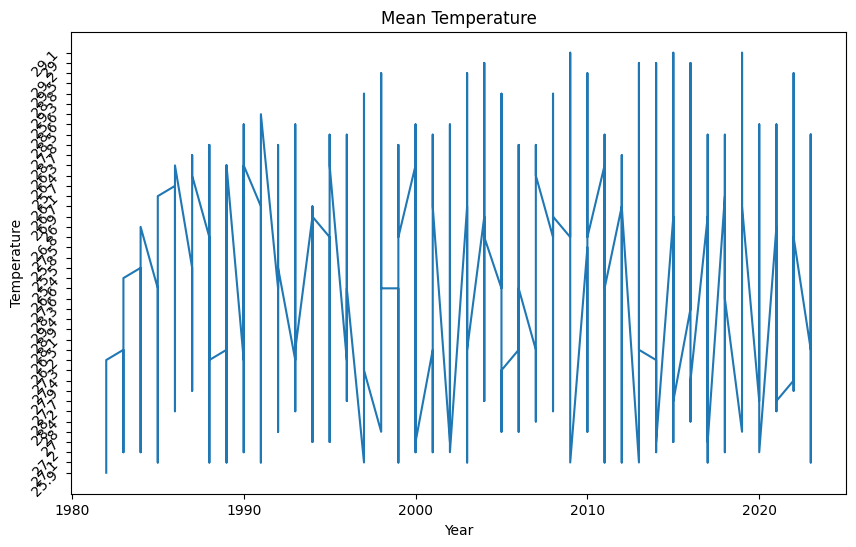

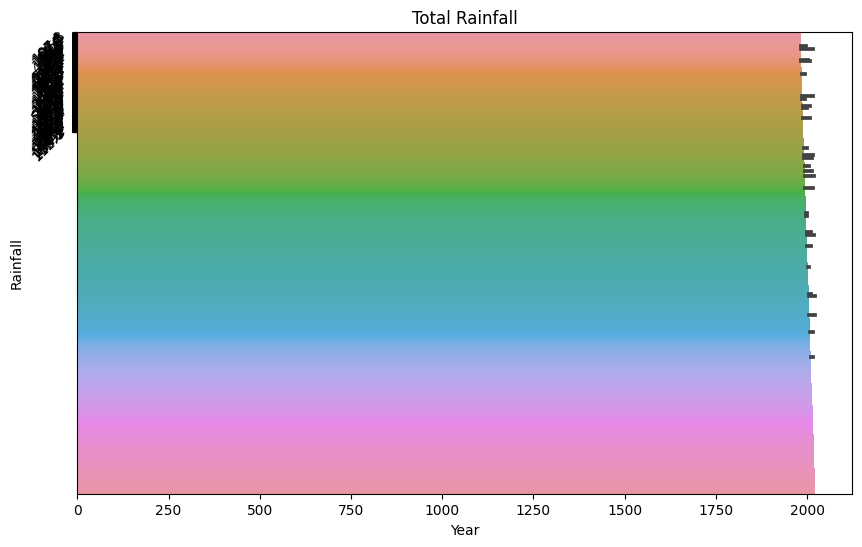

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for mean temperature
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['mean_temp'])
plt.title('Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.yticks(rotation=45)
plt.show()

# Bar plot for total rainfall
plt.figure(figsize=(10, 6))
sns.barplot(x=df['year'], y=df['total_rainfall'])
plt.title('Total Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.yticks(np.arange(0, 100, step=0.2), rotation=45)
plt.show()


Data Preprocessing: Perform necessary preprocessing steps on the data. This may include handling missing values, data cleaning, converting data types, and ensuring the data is in a suitable format for modeling.

Model Development: Implement the ARIMA model using a suitable library like statsmodels in Python. Train the model on the historical data for each variable separately. Make sure to choose appropriate orders for the AR, I, and MA components of the ARIMA model. You can use techniques like ACF and PACF plots, information criteria (AIC, BIC), and grid search to determine the optimal orders.

Model Validation: Split your data into training and validation sets. Use the training data to fit the ARIMA model and then forecast the values for the validation period. Calculate the RMSE (Root Mean Squared Error) between the predicted values and the actual values. This will serve as a measure of the model's accuracy.

Model Refinement: Iterate on the model development process by adjusting the model parameters, orders, or other settings to improve the accuracy. Consider experimenting with different variations of ARIMA models, such as SARIMA (Seasonal ARIMA) if your data exhibits seasonal patterns.

Web App Development: Create a web application using the chosen frontend framework, React. Design the user interface (UI) where users can input the number of days they want to forecast and select the variables they are interested in. Use forms or input fields to gather user input.

Backend Development: Implement the backend of your web app using Flask, a Python microframework. Set up the necessary routes and endpoints to handle user requests from the frontend. This includes receiving the user input, processing the request, and returning the forecasted values to the frontend.

Integration with ARIMA Model: Connect the frontend and backend by incorporating the ARIMA model into the Flask backend. When the user submits a forecast request, retrieve the selected variables and the number of days from the request. Use the trained ARIMA models to generate the forecasts for the specified variables and time horizon.

Displaying the Results: Once the forecasts are generated, return the results to the frontend and display them to the user. You can use visualizations, such as line charts or tables, to present the forecasted values in an intuitive and user-friendly manner.

Testing and Deployment: Test your web app thoroughly to ensure it functions correctly and provides accurate forecasts. Once you are satisfied with the app's performance, deploy it to a hosting platform or server so that it can be accessed by users.